In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
plt.style.use('classic')
import lux
from matplotlib.pyplot import xticks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_validate
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
data.head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
data.shape

(61069, 21)

In [5]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<Figure size 1280x480 with 0 Axes>

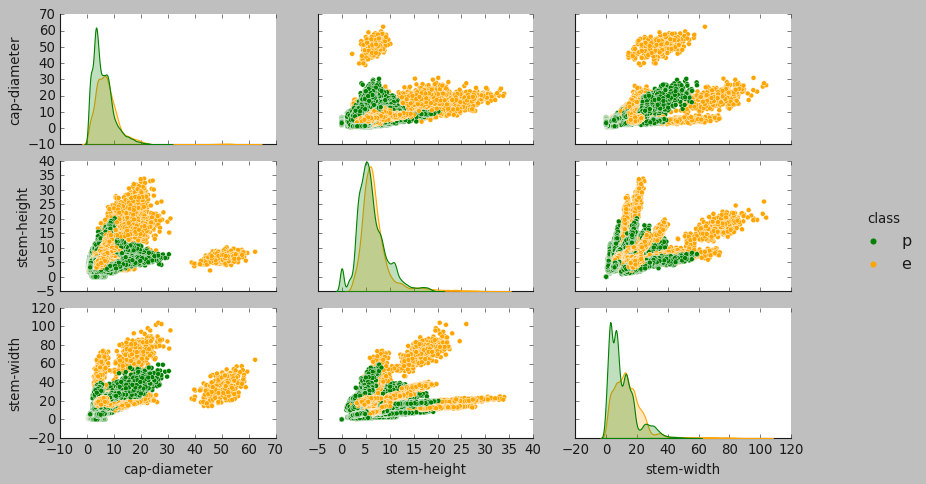

In [8]:
plt.figure(figsize=(16,6))
sns.set_palette(sns.color_palette(["green", "orange"]))
sns.pairplot(data, hue='class')
fig=plt.gcf()
fig.set_size_inches(12,6)
#plt.show()

In [9]:
for i in data.select_dtypes("O").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################  

class


p    33888
e    27181
Name: class, dtype: int64
#######################  

cap-shape


x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: cap-shape, dtype: int64
#######################  

cap-surface


t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: cap-surface, dtype: int64
#######################  

cap-color


n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64
#######################  

does-bruise-or-bleed


f    50479
t    10590
Name: does-bruise-or-bleed, dtype: int64
#######################  

gill-attachment


a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: gill-attachment, dtype: int64
#######################  

gill-spacing


c    24710
d     7766
f     3530
Name: gill-spacing, dtype: int64
########

In [10]:
data.drop(['veil-type', 'spore-print-color', 'veil-color', 'stem-root', 'stem-surface', 'gill-spacing' ], axis=1, inplace=True)

In [11]:
data['cap-surface'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
#we fill null place by'u' satnd unknown 
data['cap-surface']=data['cap-surface'].replace(np.nan,"u")

In [13]:
data['gill-attachment'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
#we fill null place by'u' satnd unknown 
data['gill-attachment']=data['gill-attachment'].replace(np.nan,"u")

In [15]:
data['ring-type'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
#we fill null place by'u' satnd unknown 
data['ring-type']=data['ring-type'].replace(np.nan,"u")

In [17]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

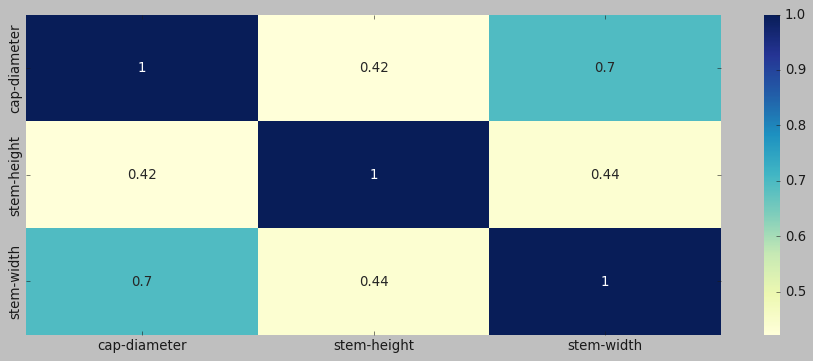

In [18]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

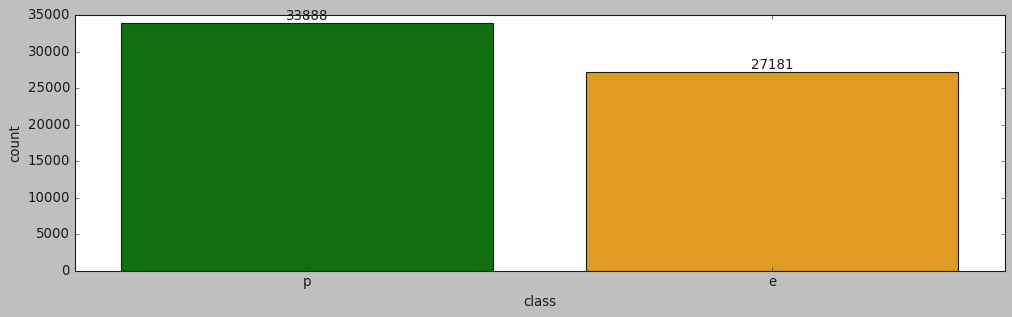

In [19]:
plt.figure(figsize=(15,4))
class_data=data["class"].value_counts().reset_index()
class_data.columns=["class","count"]
xticks(rotation=0)
ax=sns.barplot(x="class",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

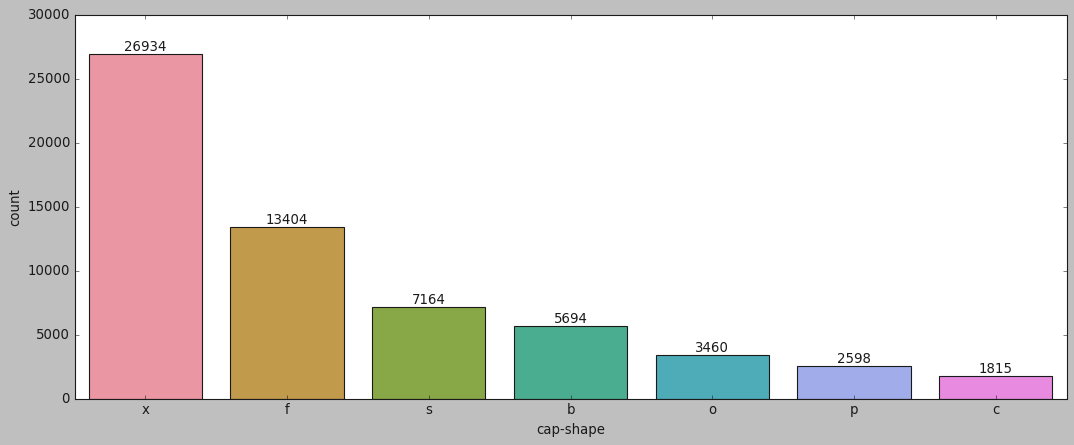

In [20]:
plt.figure(figsize=(16,6))
class_data=data["cap-shape"].value_counts().reset_index()
class_data.columns=["cap-shape","count"]
xticks(rotation=0)
ax=sns.barplot(x="cap-shape",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

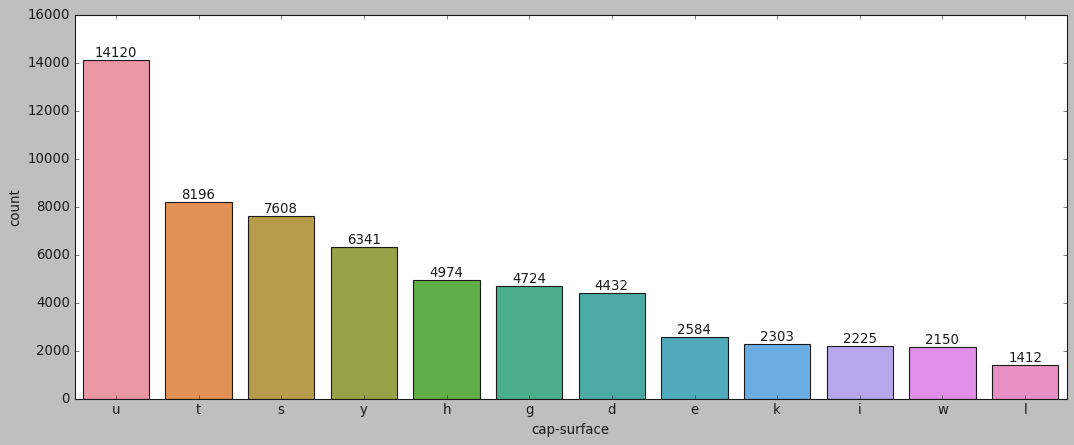

In [21]:
plt.figure(figsize=(16,6))
class_data=data["cap-surface"].value_counts().reset_index()
class_data.columns=["cap-surface","count"]
xticks(rotation=0)
ax=sns.barplot(x="cap-surface",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

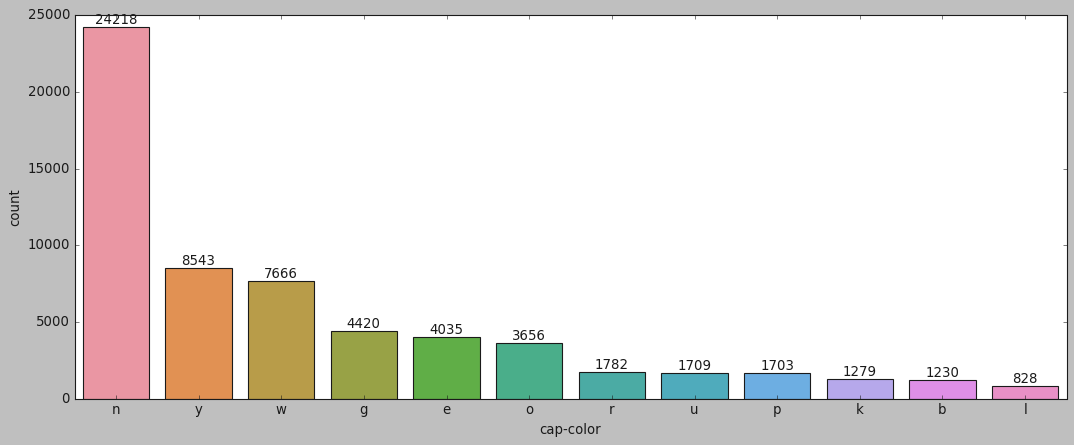

In [22]:
plt.figure(figsize=(16,6))
class_data=data["cap-color"].value_counts().reset_index()
class_data.columns=["cap-color","count"]
xticks(rotation=0)
ax=sns.barplot(x="cap-color",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

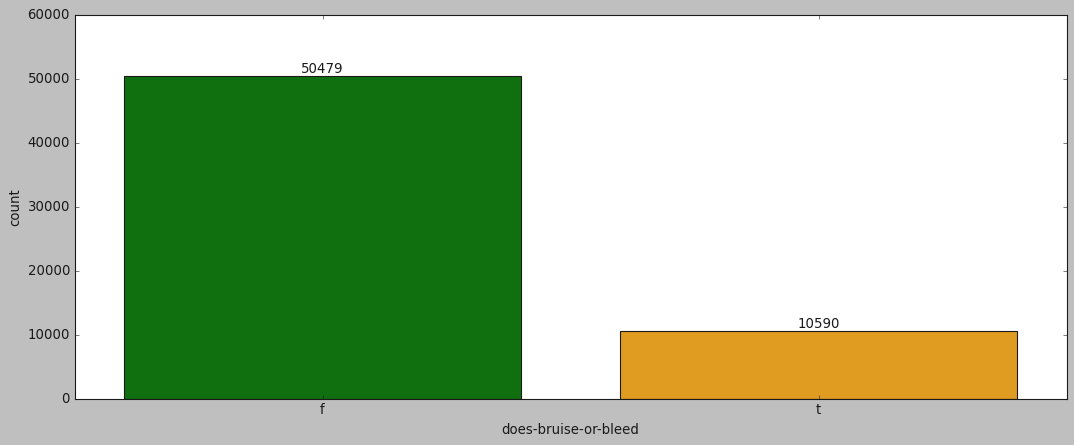

In [23]:
plt.figure(figsize=(16,6))
class_data=data["does-bruise-or-bleed"].value_counts().reset_index()
class_data.columns=["does-bruise-or-bleed","count"]
xticks(rotation=0)
ax=sns.barplot(x="does-bruise-or-bleed",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

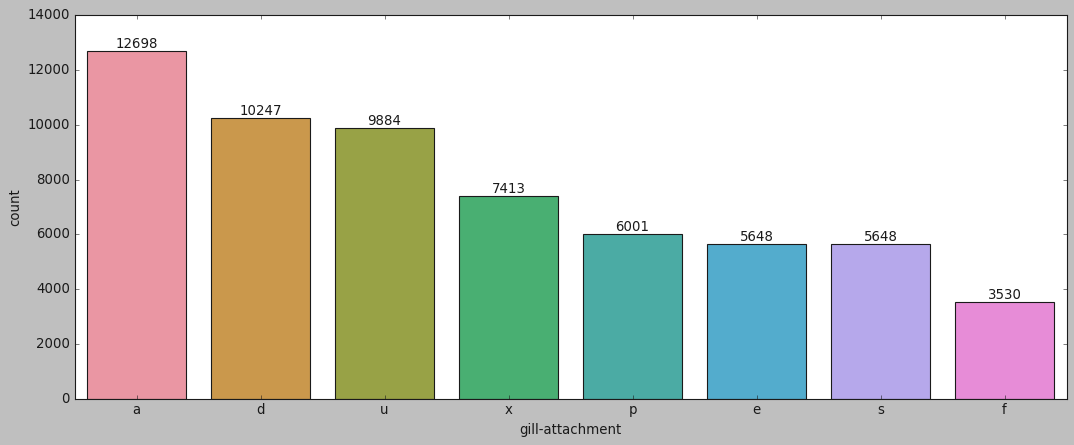

In [24]:
plt.figure(figsize=(16,6))
class_data=data["gill-attachment"].value_counts().reset_index()
class_data.columns=["gill-attachment","count"]
xticks(rotation=0)
ax=sns.barplot(x="gill-attachment",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

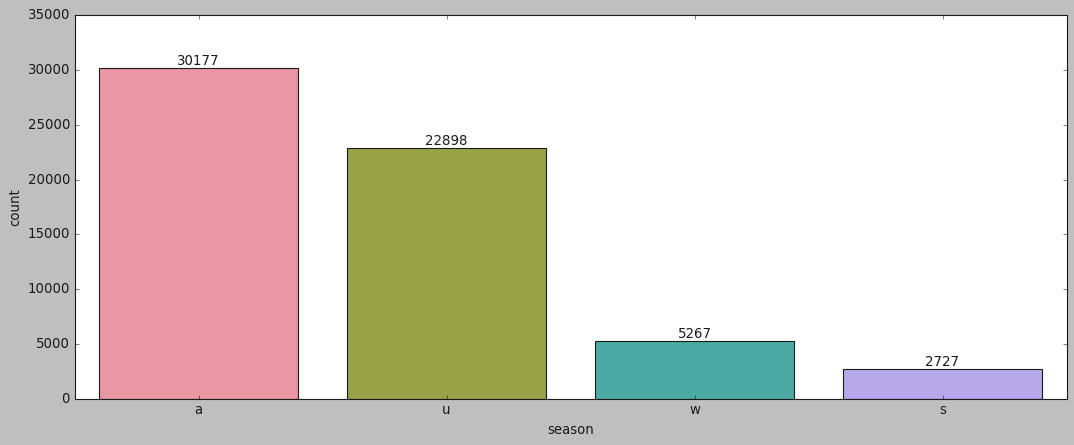

In [25]:
plt.figure(figsize=(16,6))
class_data=data["season"].value_counts().reset_index()
class_data.columns=["season","count"]
xticks(rotation=0)
ax=sns.barplot(x="season",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

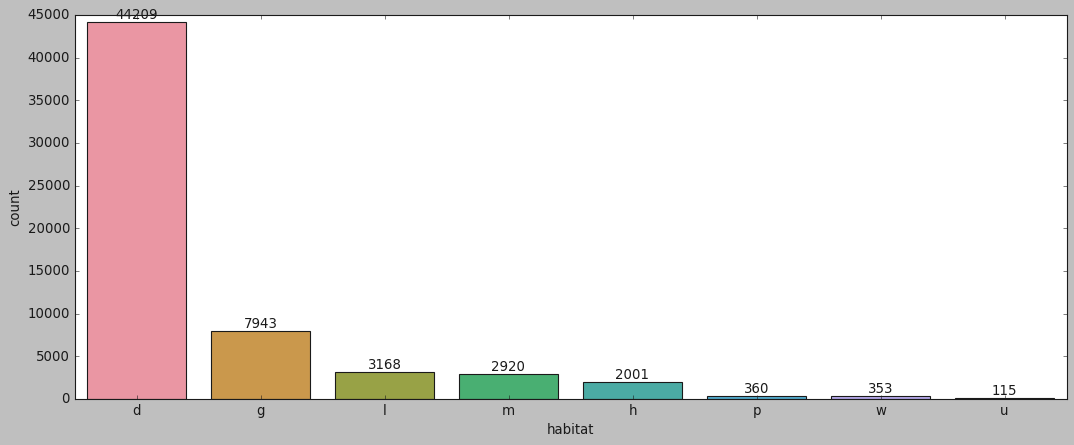

In [26]:
plt.figure(figsize=(16,6))
class_data=data["habitat"].value_counts().reset_index()
class_data.columns=["habitat","count"]
xticks(rotation=0)
ax=sns.barplot(x="habitat",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

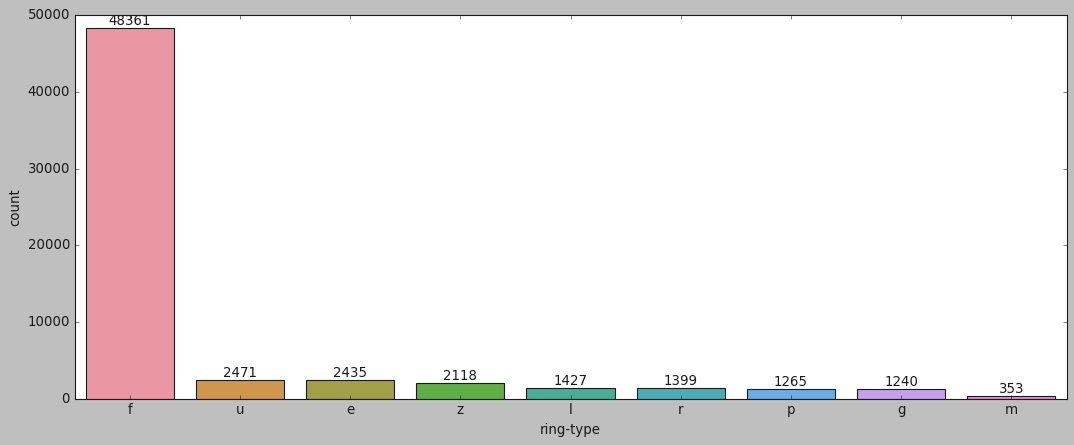

In [27]:
plt.figure(figsize=(16,6))
class_data=data["ring-type"].value_counts().reset_index()
class_data.columns=["ring-type","count"]
xticks(rotation=0)
ax=sns.barplot(x="ring-type",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

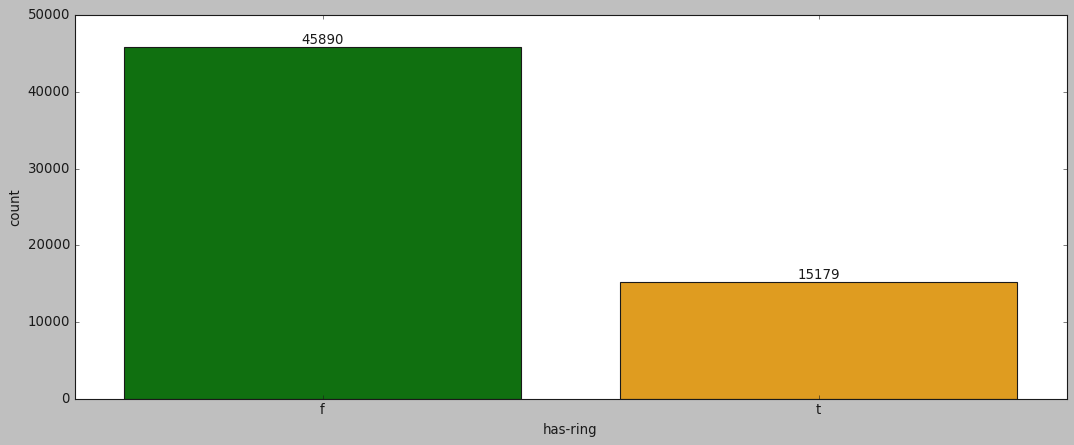

In [28]:
plt.figure(figsize=(16,6))
class_data=data["has-ring"].value_counts().reset_index()
class_data.columns=["has-ring","count"]
xticks(rotation=0)
ax=sns.barplot(x="has-ring",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

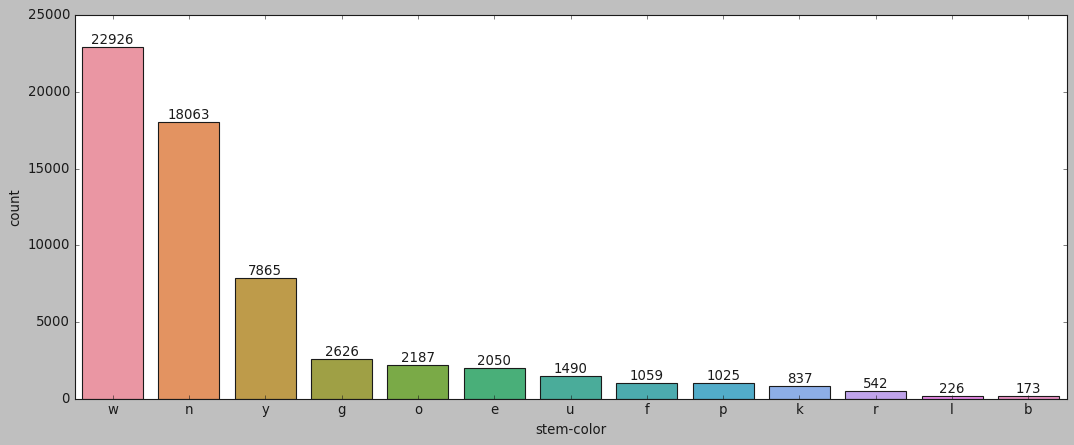

In [29]:
plt.figure(figsize=(16,6))
class_data=data["stem-color"].value_counts().reset_index()
class_data.columns=["stem-color","count"]
xticks(rotation=0)
ax=sns.barplot(x="stem-color",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

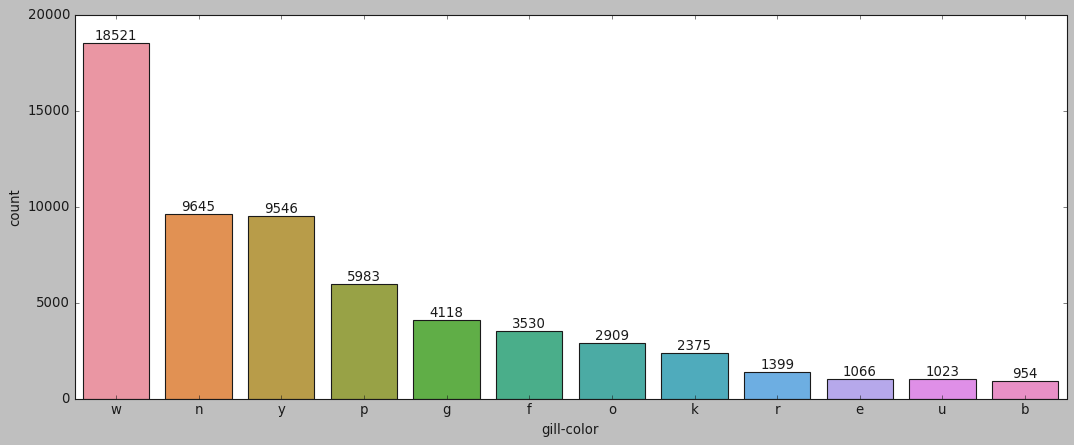

In [30]:
plt.figure(figsize=(16,6))
class_data=data["gill-color"].value_counts().reset_index()
class_data.columns=["gill-color","count"]
xticks(rotation=0)
ax=sns.barplot(x="gill-color",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

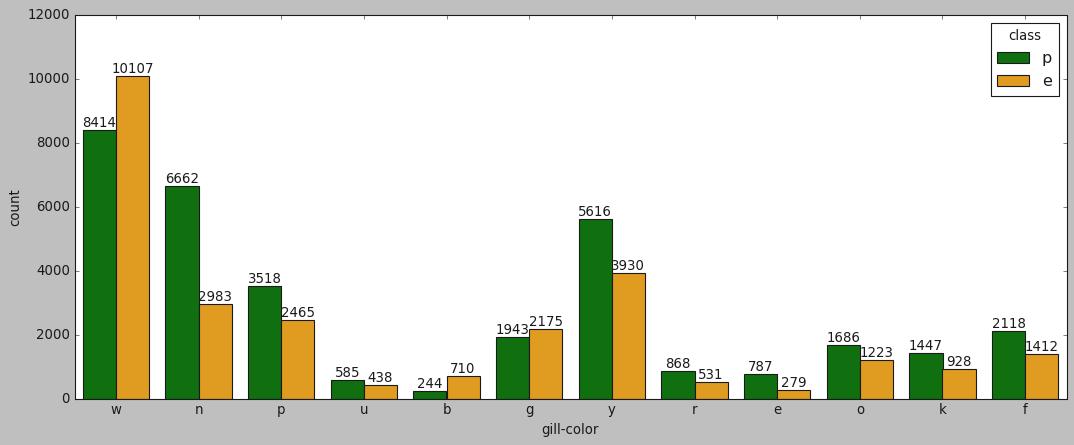

In [31]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="gill-color",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

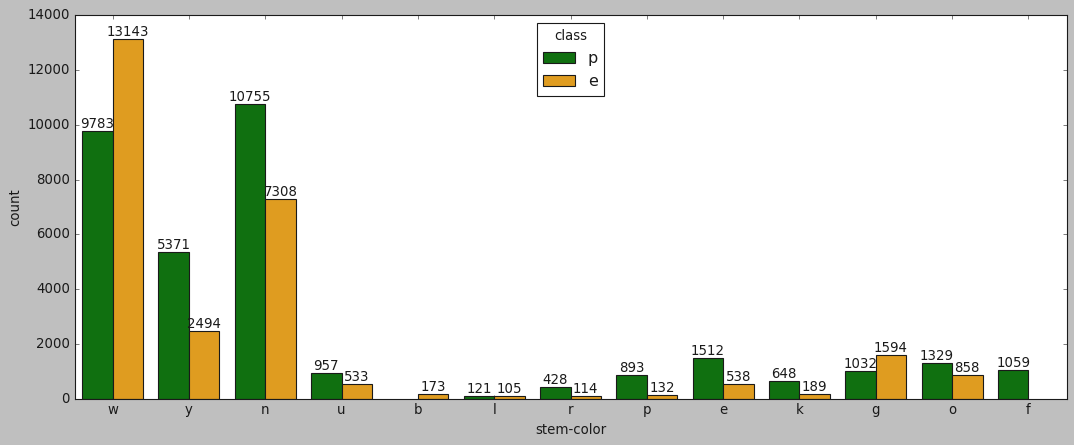

In [32]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="stem-color",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

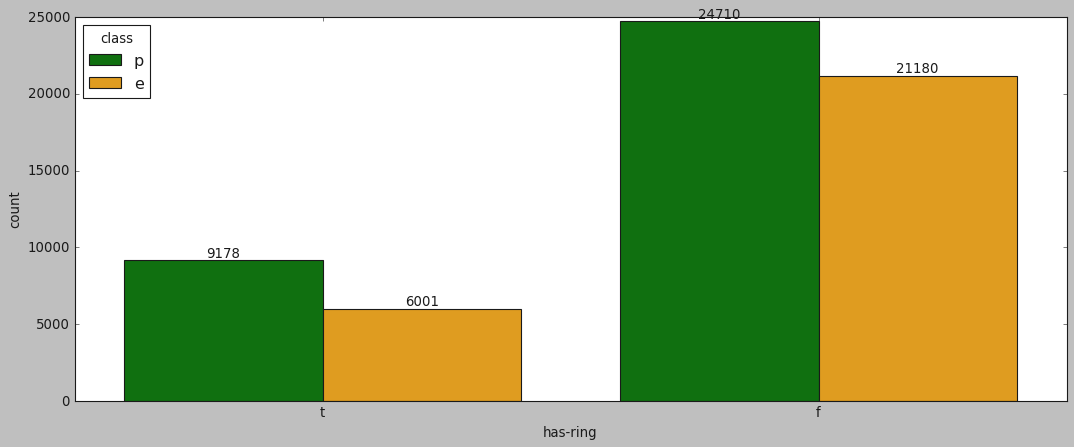

In [33]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="has-ring",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

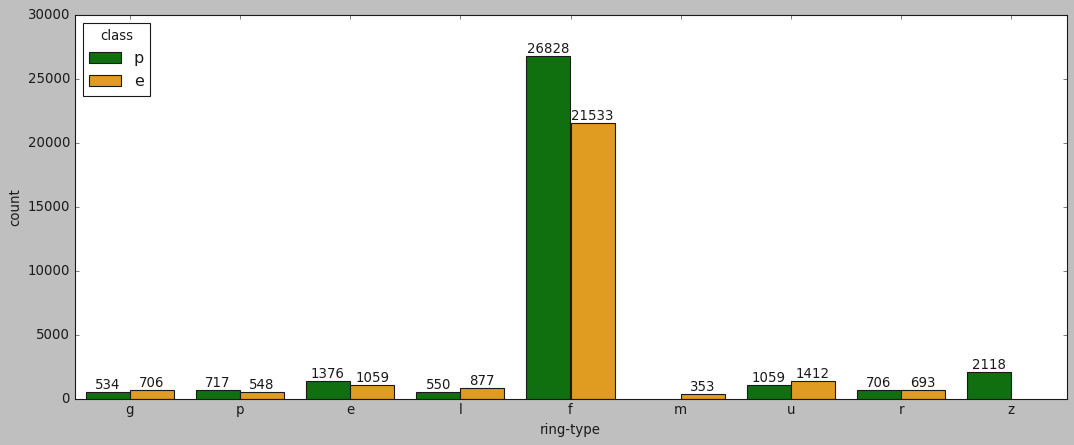

In [34]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="ring-type",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

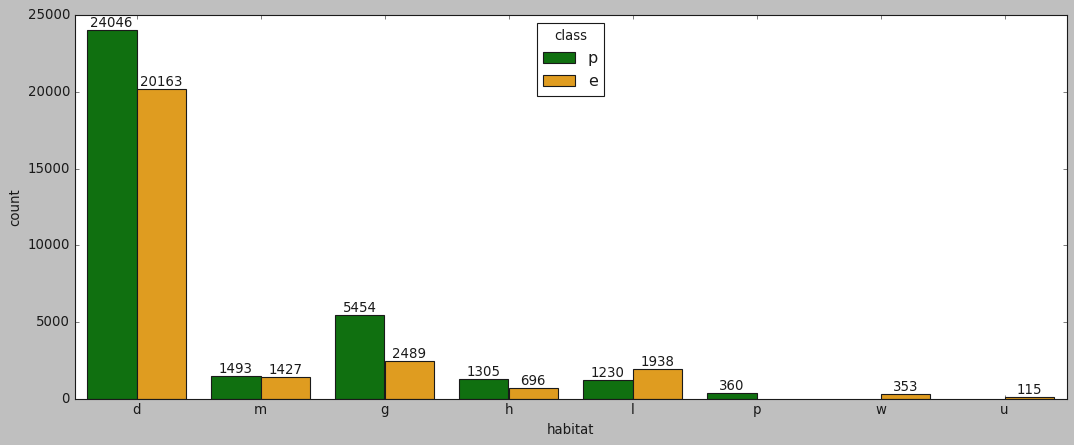

In [35]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="habitat",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

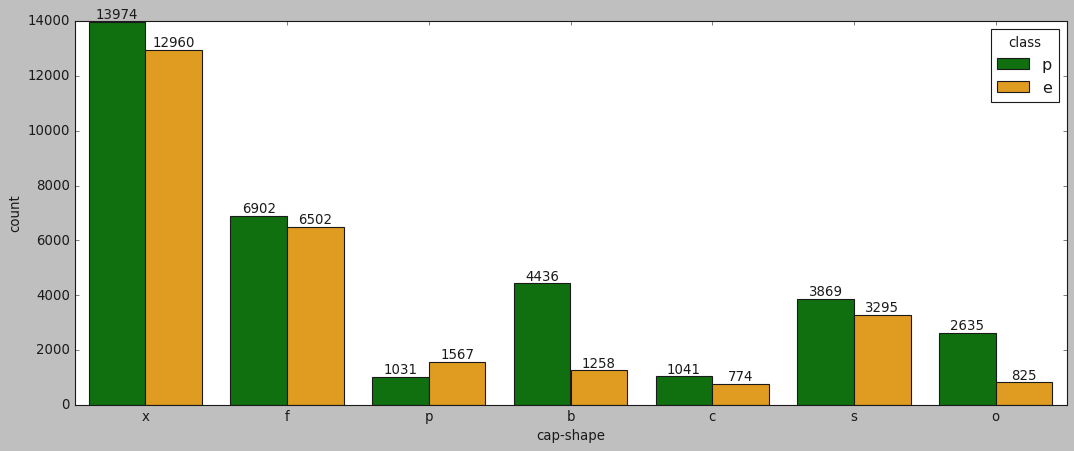

In [36]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="cap-shape",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

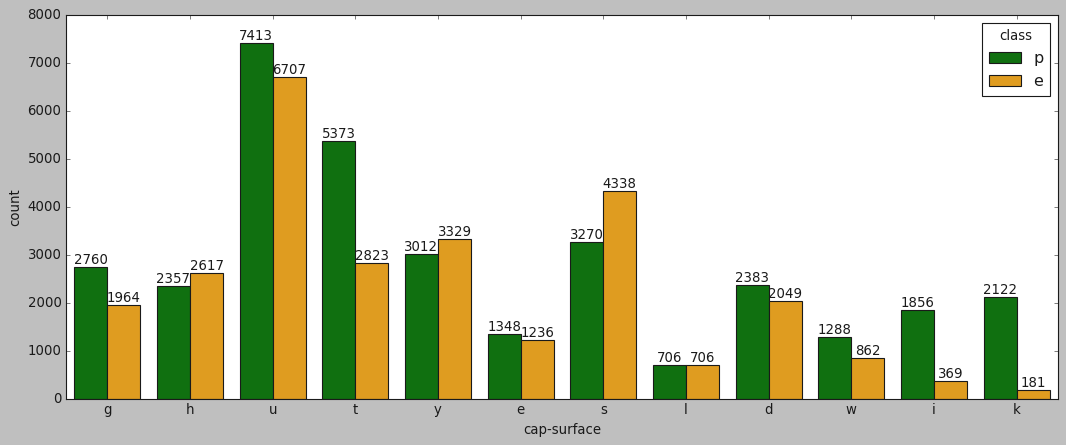

In [37]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="cap-surface",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

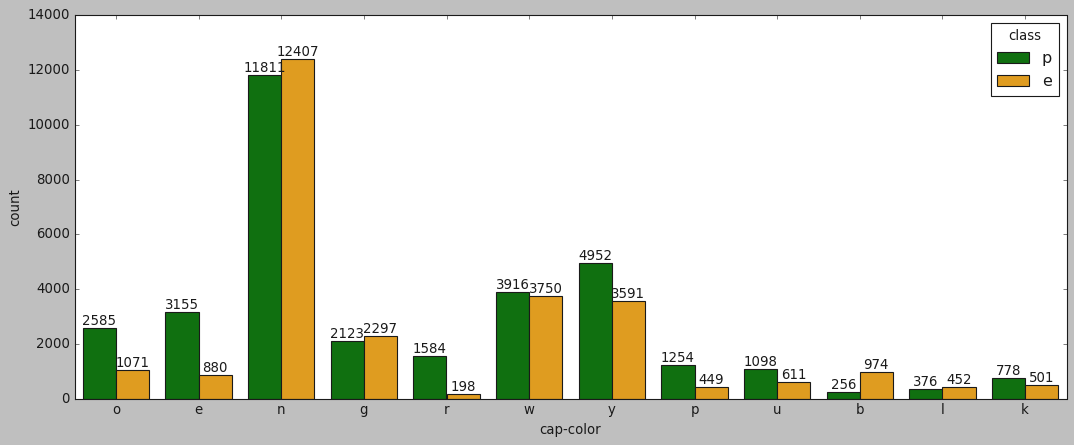

In [38]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="cap-color",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

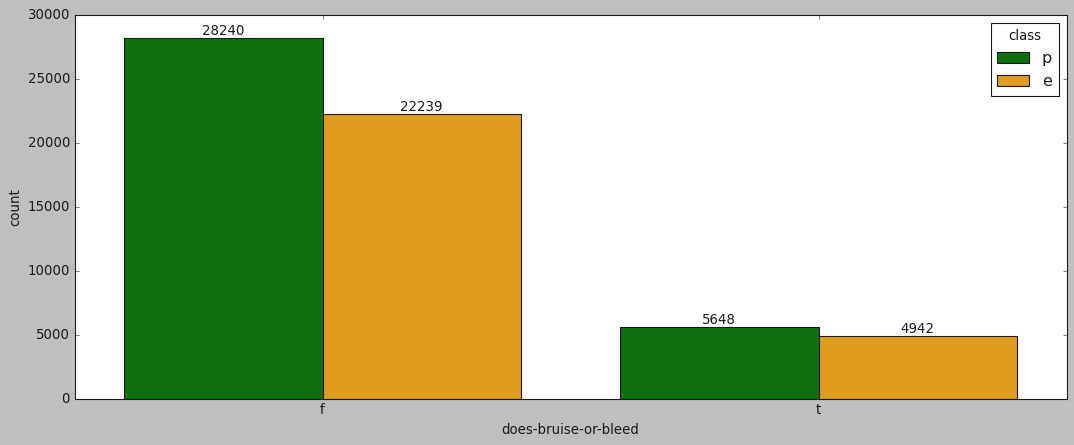

In [39]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="does-bruise-or-bleed",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

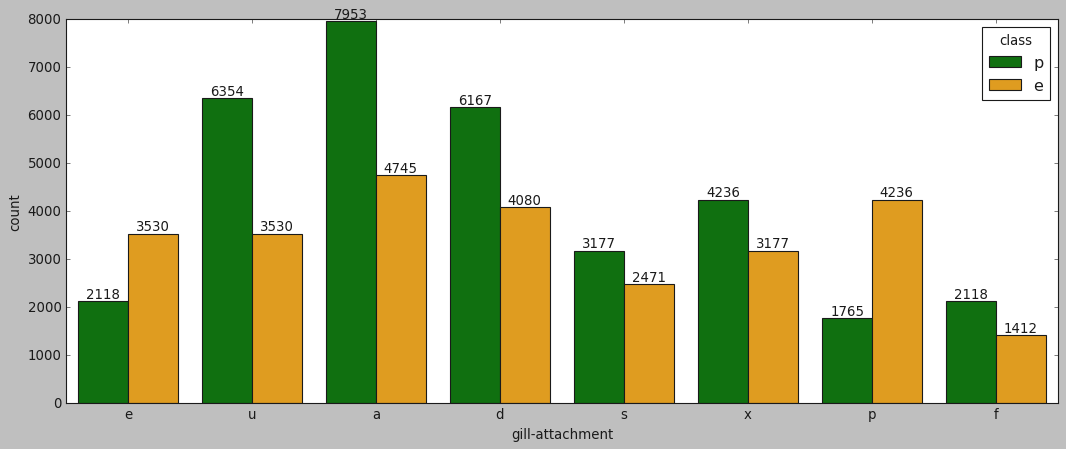

In [40]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="gill-attachment",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

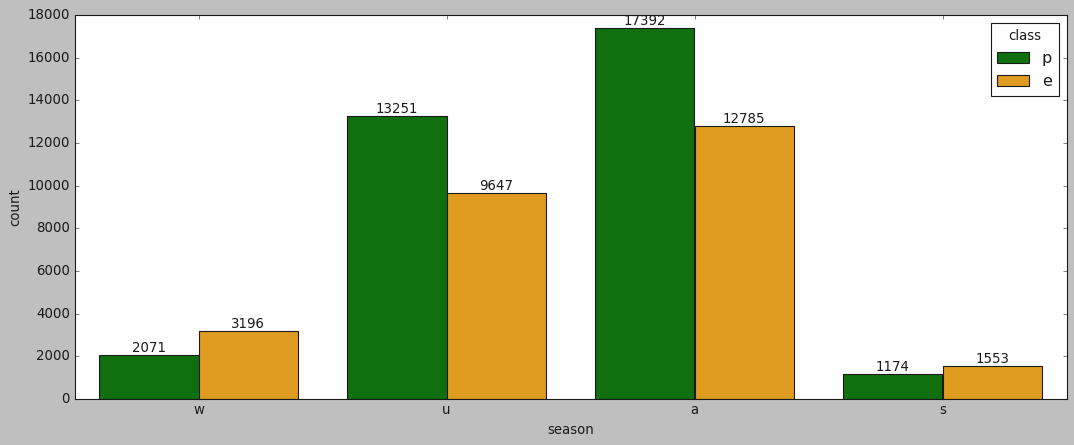

In [41]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="season",hue="class",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

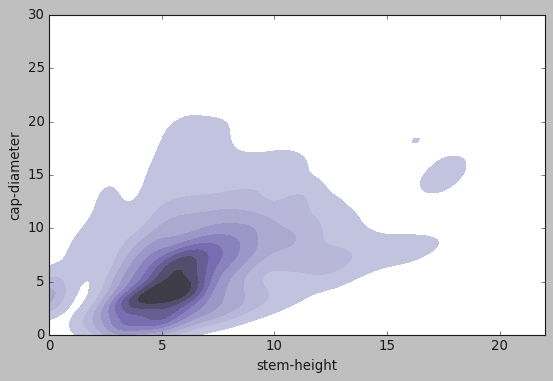

In [42]:
f, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim([0,22])
ax.set_ylim([0,30])
ax = sns.kdeplot(x=data['stem-height'], y=data['cap-diameter'],
                 cmap="Purples_d", shade=True)

<AxesSubplot:>

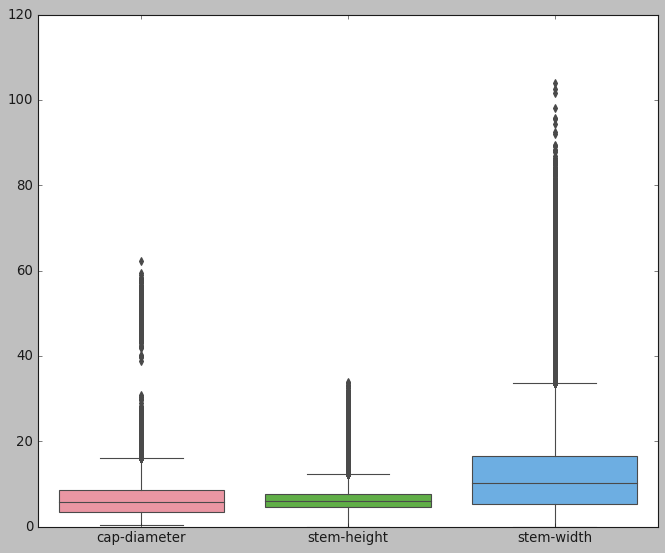

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data[['cap-diameter', 'stem-height', 'stem-width']])

In [44]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data['cap-shape'] = le.fit_transform(data['cap-shape'])
data['cap-surface'] = le.fit_transform(data['cap-surface'])
data['cap-color'] = le.fit_transform(data['cap-color'])
data['does-bruise-or-bleed'] = le.fit_transform(data['does-bruise-or-bleed'])
data['gill-attachment'] = le.fit_transform(data['gill-attachment'])
data['gill-color'] = le.fit_transform(data['gill-color'])
data['stem-color'] = le.fit_transform(data['stem-color'])
data['has-ring'] = le.fit_transform(data['has-ring'])
data['ring-type'] = le.fit_transform(data['ring-type'])
data['habitat'] = le.fit_transform(data['habitat'])
data['season'] = le.fit_transform(data['season'])

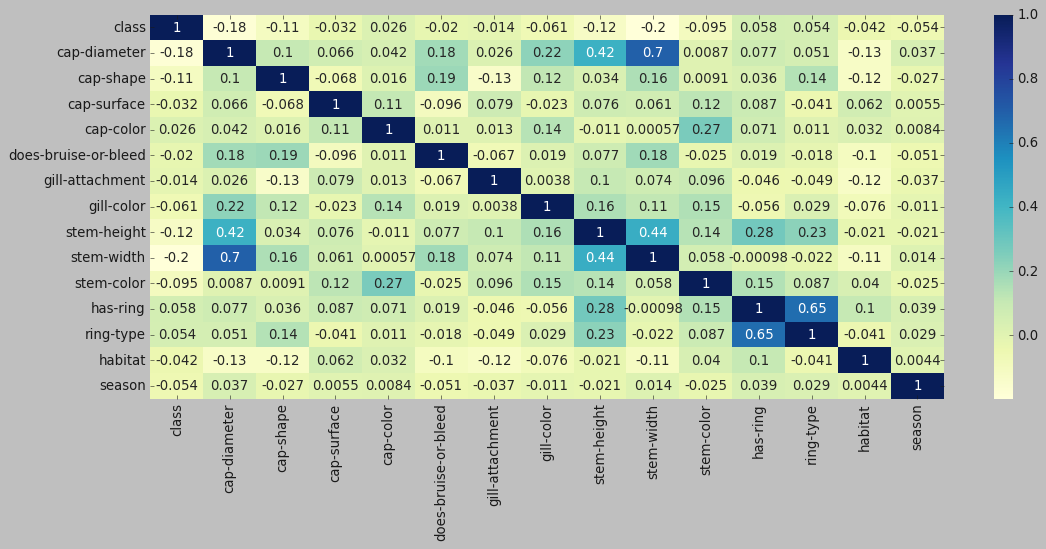

In [45]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [46]:
x = data.drop(['class'], axis=1)
y = data[['class']]

In [47]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print(pd.DataFrame(x).shape)
print(x_pca.shape)

(61069, 14)
(61069, 9)


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=101)

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=35,max_depth=40,max_leaf_nodes=90)
dt=dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
y_pred_train=dtc.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
dt_train=dt.score(x_train, y_train)
print("Training score: ",dt_train)
dt_test = dt.score(x_test, y_test)
print("Testing score: ",dt_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_dtc = dtc.predict(x_train)
y_pred_test_dtc = dtc.predict(x_test)

print(classification_report(y_train, y_pred_train_dtc))
print("**********"*10)
print(classification_report(y_test, y_pred_test_dtc))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.4989498823294246
Cross Validation Testing Score 0.5152605103485997
***************************************************Report Training And Testing Score**********************************
Training score:  0.8883839934500051
Testing score:  0.8773538562305551
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     21821
           1       0.90      0.90      0.90     27034

    accuracy                           0.89     48855
   macro avg       0.89      0.89      0.89     48855
weighted avg       0.89      0.89      0.89     48855

****************************************************************************************************
              precision    recall  f1-score

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rf=rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred_train=rfc.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
rf_train=rf.score(x_train, y_train)
print("Training score: ",rf_train)
rf_test = rf.score(x_test, y_test)
print("Testing score: ",rf_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train_rfc))
print("**********"*10)
print(classification_report(y_test, y_pred_test_rfc))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.4989498823294246
Cross Validation Testing Score 0.5152605103485997
***************************************************Report Training And Testing Score**********************************
Training score:  1.0
Testing score:  0.9984444080563288
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21821
           1       1.00      1.00      1.00     27034

    accuracy                           1.00     48855
   macro avg       1.00      1.00      1.00     48855
weighted avg       1.00      1.00      1.00     48855

****************************************************************************************************
              precision    recall  f1-score   support

   

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred=xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(xgb, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(xgb, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
xgb_train=xgb.score(x_train, y_train)
print("Training score: ",xgb_train)
xgb_test = xgb.score(x_test, y_test)
print("Testing score: ",xgb_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
print(classification_report(y_train, y_pred_train_xgb))
print("********"*10)
print(classification_report(y_test, y_pred_test_xgb))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9729185774665103
Cross Validation Testing Score 0.9491328642798225
***************************************************Report Training And Testing Score**********************************
Training score:  0.9985057824173574
Testing score:  0.9932045194039627
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21821
           1       1.00      1.00      1.00     27034

    accuracy                           1.00     48855
   macro avg       1.00      1.00      1.00     48855
weighted avg       1.00      1.00      1.00     48855

********************************************************************************
              precision    recall  f1-score   support

        

In [53]:
rf=RandomForestClassifier()
bag=BaggingClassifier()
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier()
dt=DecisionTreeClassifier()
log=LogisticRegression(class_weight="balanced",multi_class='ovr')

In [54]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*12)
    print("                       performance of ", model)
    print("##########"*12)
    cv=StratifiedShuffleSplit(n_splits=5,test_size=0.25,random_state=111)
    scoring=["f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,x_pca,y,scoring=scoring,cv=cv)
    f1_test_cv=cross_val_scores["test_f1_macro"]
    precision_test_cv=cross_val_scores["test_precision_macro"].mean()
    recall_test_cv=cross_val_scores["test_recall_macro"].mean()
    
    print("f1 test score",f1_test_cv.mean())
    print("precision test score",precision_test_cv)
    print("recall test score",recall_test_cv)

########################################################################################################################
                       performance of  RandomForestClassifier()
########################################################################################################################
f1 test score 0.9979316312248937
precision test score 0.997920114163971
recall test score 0.9979432299508515
########################################################################################################################
                       performance of  BaggingClassifier()
########################################################################################################################
f1 test score 0.9917035105280563
precision test score 0.9914922521306961
recall test score 0.9919239696071843
########################################################################################################################
                       performance of  GradientBoosti

In [55]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*12)
    print("                       Performance of ", model)
    print("##########"*12)
    
    abc=model.fit(x_train,y_train)
    y_pred=abc.predict(x_test)
    AC=accuracy_score(y_test,y_pred)
    #CR=classification_report(y_test,y_pred)
    CM=confusion_matrix(y_test,y_pred)
    #print("classification report \n",CR)
    print("Accuracy_score :",AC)
    print("\nconfusion_matrix: \n",CM)

########################################################################################################################
                       Performance of  RandomForestClassifier()
########################################################################################################################
Accuracy_score : 0.9984444080563288

confusion_matrix: 
 [[5351    9]
 [  10 6844]]
########################################################################################################################
                       Performance of  BaggingClassifier()
########################################################################################################################
Accuracy_score : 0.9923039135418372

confusion_matrix: 
 [[5324   36]
 [  58 6796]]
########################################################################################################################
                       Performance of  GradientBoostingClassifier()
####################################